In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, roc_curve, cohen_kappa_score, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import keras

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate 
from sklearn import metrics
from sklearn.svm import SVC

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.model_selection import RepeatedKFold, cross_val_score
from tensorflow.keras.models import * 
from tensorflow.keras.layers import * 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/mammographic_masses.data.txt")

In [ ]:
df.to_csv('/content/drive/MyDrive/data/mammographic_masses.data.txt', index = None)

In [ ]:
df.columns =['bi_rads', 'Age', 'Shape', 'Margin','Density', 'Severity']

In [ ]:
df.head(5)

,bi_rads,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   bi_rads   960 non-null    object
 1   Age       960 non-null    object
 2   Shape     960 non-null    object
 3   Margin    960 non-null    object
 4   Density   960 non-null    object
 5   Severity  960 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [ ]:
df.dropna()

,bi_rads,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0
...,...,...,...,...,...,...
955,4,47,2,1,3,0
956,4,56,4,5,3,1
957,4,64,4,5,3,0
958,5,66,4,5,3,1


In [ ]:
df = df.drop(df[df.bi_rads == '?'].index)
df = df.drop(df[df.Margin == '?'].index)
df = df.drop(df[df.Density == '?'].index)
df = df.drop(df[df.Shape == '?'].index)
df = df.drop(df[df.Age == '?'].index)

In [ ]:
df['bi_rads'] = pd.to_numeric(df['bi_rads'])
df['Age'] = pd.to_numeric(df['Age'])
df['Shape'] = pd.to_numeric(df['Shape'])
df['Margin'] = pd.to_numeric(df['Margin'])
df['Severity'] = pd.to_numeric(df['Severity'])
df['Density'] = pd.to_numeric(df['Density'])

In [ ]:
df.drop_duplicates()

,bi_rads,Age,Shape,Margin,Density,Severity
1,5,58,4,5,3,1
2,4,28,1,1,3,0
7,5,57,1,5,3,1
9,5,76,1,4,3,1
10,3,42,2,1,3,1
...,...,...,...,...,...,...
943,5,70,1,4,3,1
946,4,53,4,5,3,0
947,4,54,4,4,3,1
949,0,71,4,4,3,1


In [ ]:
input_features = df.drop("Severity",axis=1)   #Feature Matrix
target_feature = df["Severity"]          #Target Variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(input_features, target_feature, test_size=0.25) 

In [ ]:
print(f"input train size = {x_train.shape}, input test size = {x_test.shape}, output train size = {y_train.shape}, output test size = {y_test.shape}")

input train size = (621, 5), input test size = (208, 5), output train size = (621,), output test size = (208,)


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)
('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.7355769230769231)

In [ ]:
target_names = ["benign", "malignant"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.74      0.78      0.76       110
   malignant       0.74      0.68      0.71        98

    accuracy                           0.74       208
   macro avg       0.74      0.73      0.73       208
weighted avg       0.74      0.74      0.73       208



In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix is:
[[86 24]
 [31 67]]


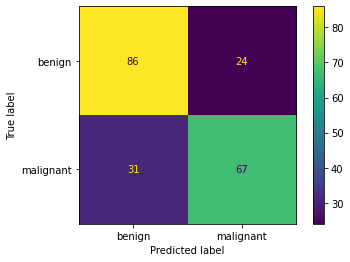

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign','malignant'])
disp.plot()
plt.show()

In [ ]:
classifier = GaussianNB()
classifier = classifier.fit(x_train, y_train)
y_predicted = classifier.predict(x_test)

In [ ]:
print("Accuracy score:{:.2f}%".format(metrics.accuracy_score(y_test, y_predicted)*100))

Accuracy score:76.92%


In [ ]:
target_names = ['benign', 'malignant']
print(classification_report(y_test, y_predicted, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.73      0.77      0.75        94
   malignant       0.80      0.77      0.79       114

    accuracy                           0.77       208
   macro avg       0.77      0.77      0.77       208
weighted avg       0.77      0.77      0.77       208



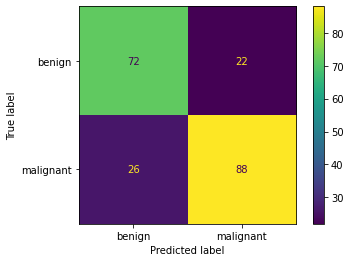

In [ ]:
cm = confusion_matrix(y_test, y_predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign','malignant'])
disp.plot()
plt.show()

In [ ]:
SupportVectorClassModel = SVC()
SupportVectorClassModel.fit(x_train,y_train)
y_pred = SupportVectorClassModel.predict(x_test)

In [ ]:
print("Accuracy score:{:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy score:78.37%


In [ ]:
target_names = ["benign", "malignant"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.81      0.76      0.78       107
   malignant       0.76      0.81      0.78       101

    accuracy                           0.78       208
   macro avg       0.78      0.78      0.78       208
weighted avg       0.79      0.78      0.78       208



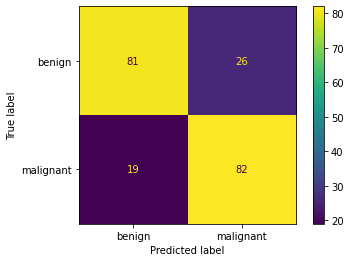

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=SupportVectorClassModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["benign", "malignant"])
disp.plot()
plt.show()

In [ ]:
model = Sequential()
model.add(Dense(64,input_shape=(5,),activation = 'relu',kernel_initializer='glorot_uniform')) 
model.add(Dense(32,activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(Dense(16,activation = 'relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform')) 
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='binary_crossentropy',optimizer = opt ,metrics = ['accuracy']) 

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
show_training_process = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[monitor])

model.summary()

Epoch 1/50
10/10 [==============================] - 2s 72ms/step - loss: 0.9308 - accuracy: 0.5201 - val_loss: 0.7399 - val_accuracy: 0.3365
Epoch 2/50
10/10 [==============================] - 0s 23ms/step - loss: 0.7566 - accuracy: 0.4525 - val_loss: 0.7273 - val_accuracy: 0.4808
Epoch 3/50
10/10 [==============================] - 0s 21ms/step - loss: 0.7270 - accuracy: 0.4605 - val_loss: 0.6830 - val_accuracy: 0.4904
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.6898 - accuracy: 0.5089 - val_loss: 0.6690 - val_accuracy: 0.6442
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6631 - accuracy: 0.6039 - val_loss: 0.6359 - val_accuracy: 0.5192
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6424 - accuracy: 0.6538 - val_loss: 0.6311 - val_accuracy: 0.5144
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 0.6329 - val_loss: 0.6041 - val_accuracy: 0.7548
Epoch 8/50
10/10

In [ ]:
test_results = model.evaluate(x_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

7/7 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.7788
Test results - Loss: 0.4579402506351471 - Accuracy: 77.88461446762085


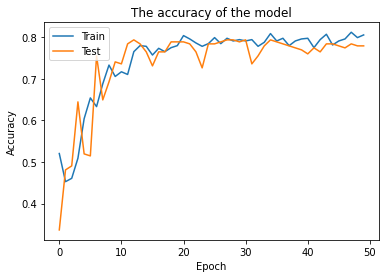

In [ ]:
plt.plot(show_training_process.history['accuracy'])
plt.plot(show_training_process.history['val_accuracy'])
plt.title('The accuracy of the model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

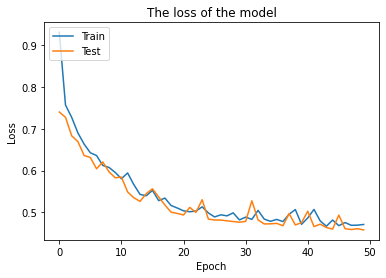

In [ ]:
plt.plot(show_training_process.history['loss'])
plt.plot(show_training_process.history['val_loss'])
plt.title('The loss of the model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

7/7 [==============================] - 0s 2ms/step


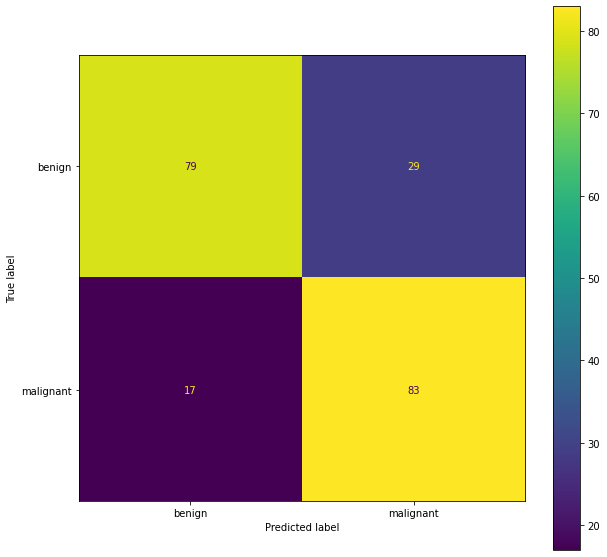

In [ ]:
y_predected = model.predict(x_test)
y_predected =(y_predected>0.5)
#list(y_pred)

conf_mat = confusion_matrix(y_test, y_predected)
disp_mat = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['benign','malignant'])
fig, ax = plt.subplots(figsize=(10,10))
disp_mat.plot(ax=ax)